# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [2070]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

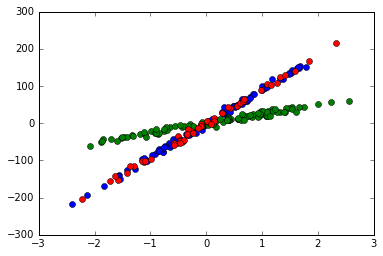

In [2071]:
from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
plt.plot(x1,y1,'o')

############### More DATASETS

(x2,y2) = make_regression(n_samples=100, n_features=n_dimensions, noise=5)
(x2_test,y2_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=5)
plt.plot(x2,y2,'o')
plt.plot(x2_test,y2_test, 'o')

(x3,y3) = make_regression(n_samples=100, n_features=n_dimensions, noise=20)
(x3_test,y3_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=20)
#plt.plot(x3,y3,'o')
#plt.plot(x3_test,y3_test, 'o')

(x4,y4) = make_regression(n_samples=100, n_features=n_dimensions, noise=1)
(x4_test,y4_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=1)
#plt.plot(x4,y4,'o')

(x5,y5) = make_regression(n_samples=200, n_features=n_dimensions, noise=5)
(x5_test,y5_test) = make_regression(n_samples=100, n_features=n_dimensions, noise=5)
#plt.plot(x5,y5,'o')

(x6,y6) = make_regression(n_samples=200, n_features=n_dimensions, noise=0)
(x6_test,y6_test) = make_regression(n_samples=100, n_features=n_dimensions, noise=0)
#add outlier
x6[-1]=5
y6[-3]=50
#plt.plot(x6,y6,'o')

# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

dataset 1: n_samples=100, noise=5, score= 0.603991818233


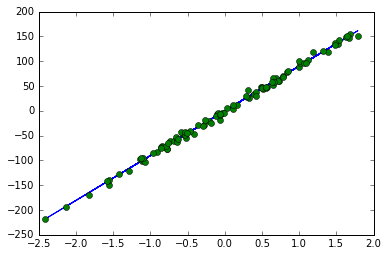

dataset 2: n_samples=100, noise=7, score= 0.474090160207


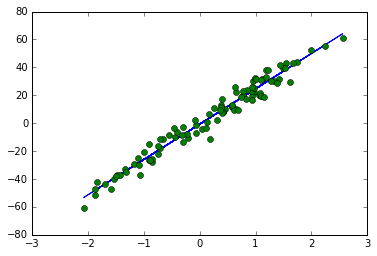

dataset 3: n_samples=100, noise=10, score= 0.392970581639


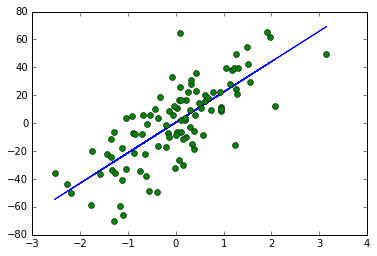

dataset 4: n_samples=100, noise=1, score= -359.594890675


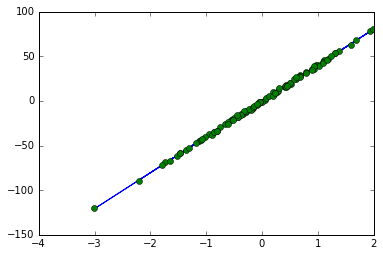

dataset 5: n_samples=200, noise=5, score= 0.796417037073


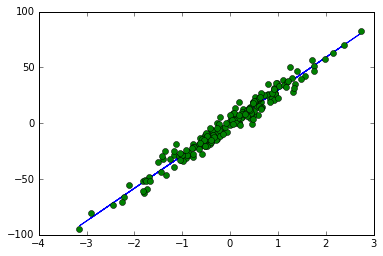

dataset 6 (with outliers): n_samples=200, noise=0, score= -38.2815061347


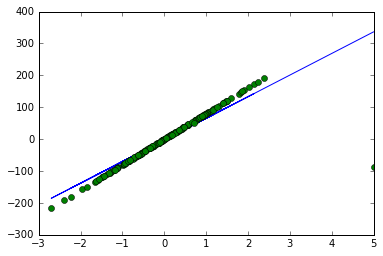

In [2072]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#1: Fit the regression object on the data
regr.fit(x1,y1)

#2: Print the score that the fit has
print """dataset 1: n_samples=100, noise=5, score=""", regr.score(x1_test,y1_test)

#3: Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

#Repeat steps 1,2,3 for x2 and y2 
regr.fit(x2,y2)
print """dataset 2: n_samples=100, noise=7, score=""", regr.score(x2_test,y2_test)
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()

#Repeat 1,2,3 for x3 and y3 
regr.fit(x3,y3)
print """dataset 3: n_samples=100, noise=10, score=""", regr.score(x3_test,y3_test)
plt.plot(x3,regr.predict(x3))
plt.plot(x3,y3,'o')
plt.show()

#Repeat 1,2,3 for x4 and y4 
regr.fit(x4,y4)
print """dataset 4: n_samples=100, noise=1, score=""", regr.score(x4_test,y4_test)
plt.plot(x4,regr.predict(x4))
plt.plot(x4,y4,'o')
plt.show()

#Repeat 1,2,3 for x5 and y5 
regr.fit(x5,y5)
print """dataset 5: n_samples=200, noise=5, score=""", regr.score(x5_test,y5_test)
plt.plot(x5,regr.predict(x5))
plt.plot(x5,y5,'o')
plt.show()

#Repeat 1,2,3 for x6 and y6 
regr.fit(x6,y6)
print """dataset 6 (with outliers): n_samples=200, noise=0, score=""", regr.score(x6_test,y6_test)
plt.plot(x6,regr.predict(x6))
plt.plot(x6,y6,'o')
plt.show()

## Your analysis

As a general rule, increasing the amount of noise leads to a decrease of the regression score of the fit. In the same way, decreasing the amount of noise leads to a increase of the score of the fit, the limit approaching 1. We could conclude that the 'perfect' regression score is 1, and that it is more difficult to form a linear prediction function through a more widespread dataset (with bigger noise), than it is to do so through a more localized dataset (with smaller noise).

Increasing the number of samples simply means adding more points to the graph, increasing the randomness of their coordinates, too.

Adding outliers (like here in dataset 6) has a considerable impact on the equation of the fitting line, decreasing the regression score noticeably.

However, it is noticeable that with a smaller noise, there is a bigger difference between the (fitting line) equation of the actual dataset and the equation of the corresponding TEST dataset. Similarly, datasets (actual and test) with a big noise have a more similar fitting line.

n_samples=100, noise=5, score= 0.603991818233


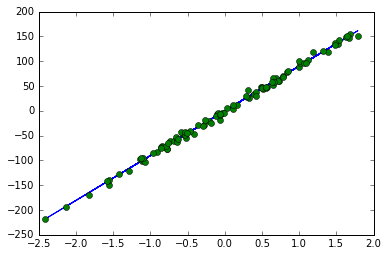

n_samples=100, noise=5, with outliers, score= -0.0604207828574


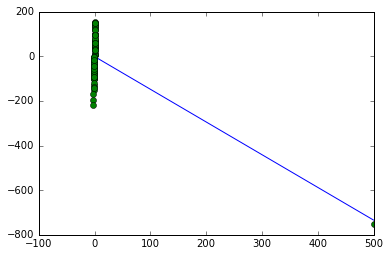

In [2073]:
#Add a serious outlier and see what happens

#plot the first dataset again (without serious outliers) to compare it later
regr.fit(x1,y1)
print """n_samples=100, noise=5, score=""", regr.score(x1_test,y1_test)
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

#create serious outlier
x1[-1] = 500 
y1[-1] = -750

#plot the first dataset, this time with outliers
regr.fit(x1,y1)
print """n_samples=100, noise=5, with outliers, score=""", regr.score(x1_test,y1_test)
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [2074]:
#Make a prediction function h
def prediction_function(x,theta0,theta1):
    #return h(x) = theta0 + theta1*x
    return numpy.add(theta0, theta1*x)

In [2075]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    #to check the dimensions:
    #print x_predict.shape, y.shape
    
    #transpose x_predict so it has the same dimensions as y
    x_predict_t = x_predict.transpose()
    
    #define m as the size (number of values) of the dataset
    m = len(x_predict)
    #calculate sum, then return it
    s = numpy.sum((x_predict_t - y)**2) / (2*m)
    return s

In [2076]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict,y, x):
    #define m as the size (number of values) of the dataset
    m = len(x_predict)
    
    #transpose x_predict so it has the same dimensions as y
    x_predict_t = x_predict.transpose()
    
    #calculate theta0 and theta1 using the sum function
    dtheta0 = np.sum(x_predict_t - y) / m
    dtheta1 = np.sum((x_predict_t - y).dot(x))/m
    return dtheta0, dtheta1

Hypothesis (blue) and data points (green):


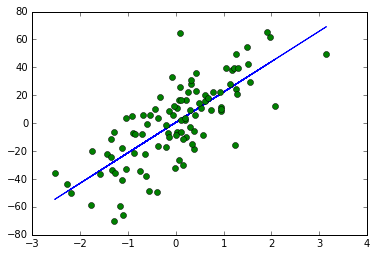

Cost function:


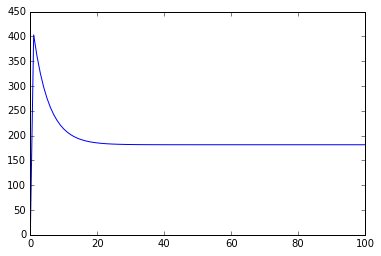

In [2077]:
#These are some default parameters, see how playing with them affects the behavior
alpha = 0.1
theta0 = 0
theta1 = 1
x = x3
y = y3
iterations = 100
stopcondition = -100

#initializing values
i = 0
dtheta0 = 0
dtheta1 = 0
#initialize cost as an array of shape (1,) filled with zeros
cost = np.zeros(shape=(1,))
#Save the output of the cost function at each iteration and plot it at the end
while (i < iterations) and (cost[-1] > stopcondition):
    #save the prediction function h(x) under 'x_predict' using prediction_function()
    x_predict = prediction_function(x,theta0,theta1)
    
    #save each iteration's cost by adding it to the cost list
    cost = np.append(cost, cost_function(x_predict,y))
    
    #save the gradient values under dtheta0 and dtheta1
    dtheta0, dtheta1 = compute_gradient(x_predict,y, x)
    #update theta0 and theta1 at each iteration
    theta0 -= alpha*dtheta0
    theta1 -= alpha*dtheta1
    
    #add 1 to i to continue with the next iteration (if i < maximum #iterations)
    i = i + 1
    
#plot the hypothesis (prediction function) and the points of the dataset
print 'Hypothesis (blue) and data points (green):'
plt.plot(x,prediction_function(x,theta0,theta1))
plt.plot(x,y,'o')
plt.show()
#plot the cost function, the number of iterations on the x-axis
print 'Cost function:'
array = np.arange(iterations+1)
plt.plot(array, cost)

## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

The goal is to minimize the cost function. Hence, the amount of iterations should be such that the cost function approaches a certain number (>=0), without going on and on without significant changes. In other words, once the graph of the cost function is clear in what number it approches asymptotically, there should be only about (let's say) half of the total amount of iterations left. In the case plotted above, this optimal number of iterations is about 100, being big enough to be sure to obtain a correct result for each dataset.

If the learning rate 'alpha' is increased, the cost function converges more quickly. With 100 iterations, the optimal value of alpha is 0.1, because the cost function converges slowly enough to be able to read the graph, but at the same time quickly enough to be sure that it converges (clearly approaches its minumum). If alpha is too big (for instance 13), then the cost function does not converge, but diverges.

As said before, the trend of the cost function is such that the function asymptotically approaches a certain positive number (its minimum), or in other words, it converges. The initial spike can be ignored, because the cost function was initialized as an array with zeros, which is why it starts at the origin of the graph.

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.

In [2078]:
#Make a prediction function h
def prediction_function(x,theta1):  #theta0 is 0 so can be neglected throughout this problem
    return theta1*x

In [2079]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_theta1(x_p,y):
    #transpose x_predict
    x_t = x_p.transpose()
    
    #calculate theta1 using the given formula  
    theta1 = numpy.dot(numpy.linalg.inv(numpy.dot(x_t,x_p)), numpy.dot(x_t,y))
    
    return theta1

Hypothesis (blue) and the data points (green):


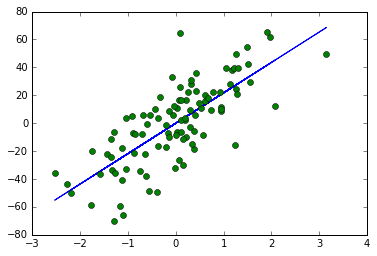

In [2080]:
#Define x and y
x = x3
y = y3

#calculate theta1 using the function above
theta1 = compute_theta1(x,y)

#while loop is not needed in this case

#plot the hypothesis and the points of the dataset
print 'Hypothesis (blue) and the data points (green):'
plt.plot(x,prediction_function(x,theta1))
plt.plot(x,y,'o')
plt.show()